In [42]:
from keras.models import load_model, model_from_json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [43]:
# Load in model
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [44]:
test_features = np.load("TestingData.npy")
test_labels = np.load("TestingLabels.npy")

In [45]:
# Get model accuracy 
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
scores = loaded_model.evaluate(test_features, test_labels)
print('\n')

56962/56962 [==============================] - 1s 25us/step




In [46]:
# Get predictions from model
output = loaded_model.predict_classes(test_features)
probs = loaded_model.predict_proba(test_features)

In [58]:
print('accuracy=',scores[1])
print('\n')

# Show confusion matrix
y_actu = pd.Series(test_labels, name='Actual')
y_pred = pd.Series(np.ndarray.flatten(output), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)
print ('\n')

TN = df_confusion[0][0]
TP = df_confusion[1][1]
FN = df_confusion[0][1]
FP = df_confusion[1][0]


num_positives = (np.count_nonzero(y_actu))
num_negatives = y_actu.size - num_positives
precision = TP/(TP + FP)
recall = TP/(TP + FN)
specificity = TN/(TN + FP)
f1 = 2*((precision*recall)/(precision+recall))
print("Num Fraud: {}".format(num_positives))
#print("True Negative: {}".format(TN/num_negatives))
#print("True Positive: {}".format(TP/num_positives))
#print("False Negative: {}".format(FN/(TP + FN)))
#print("False Positive: {}".format(FP/(FP + TN)))
print("Precision: ", precision)
print("Recall/Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1 Score: ", f1)

# Get incorrctly predicted
indices = [i for i,v in enumerate(output) if output[i]!=test_labels[i] and output[i] == 0]
incorrect = [test_features[i, 29] for i in indices]
print("\nIndividual cost of false negatives:\n{}".format(incorrect))

accuracy= 0.9994557775359011


Predicted      0   1
Actual              
0.0        56846  13
1.0           18  85


Num Fraud: 103
Precision:  0.8673469387755102
Recall/Sensitivity:  0.8252427184466019
Specificity:  0.9997713642519214
F1 Score:  0.8457711442786069

Individual cost of false negatives:
[0.76, 0.77, 276.17, 1.0, 1.0, 8.0, 480.72, 31.91, 0.0, 5.09, 1.52, 634.3, 549.06, 720.8, 1809.68, 1354.25, 3.22, 0.76]


In [48]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [49]:
auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % auc)

AUC: 0.95


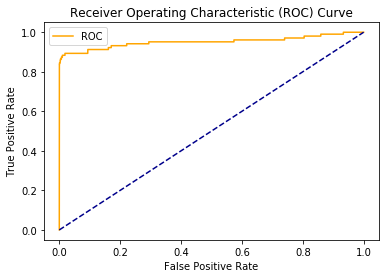

In [50]:
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plot_roc_curve(fpr, tpr)